In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('../Data/train_labels.csv')
df2 = pd.read_csv('../Data/Old_data/UnimodalLabels.csv')
df2 = df2.rename(columns={'image':'id_code'})
df2 = df2.rename(columns={'level':'diagnosis'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f066dadd8>]],
      dtype=object)

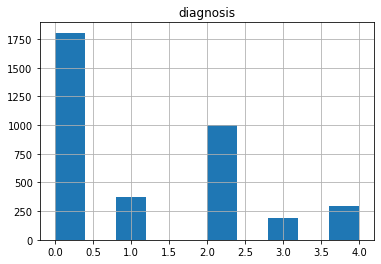

In [4]:
df1.hist()

In [5]:
df1.groupby('diagnosis').size()/3661.0

diagnosis
0    0.493035
1    0.101065
2    0.272876
3    0.052718
4    0.080579
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f262402ee80>]],
      dtype=object)

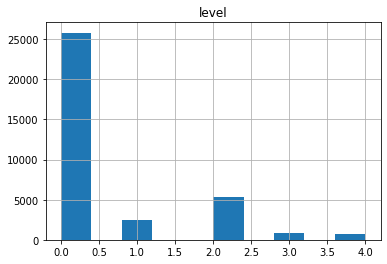

In [4]:
df2.hist()

In [8]:
df2.groupby('diagnosis').size()

diagnosis
0    25802
1     2438
2     5288
3      872
4      708
dtype: int64

In [4]:
df1 = df1[df1.diagnosis != 0]
df2 = df2[df2.diagnosis != 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f341e6a4f28>]],
      dtype=object)

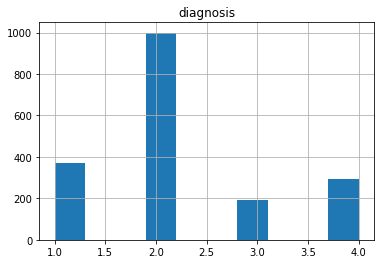

In [9]:
df1.hist()

In [6]:
df1.groupby('diagnosis').size()

diagnosis
1    370
2    999
3    193
4    295
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f341ecb1d30>]],
      dtype=object)

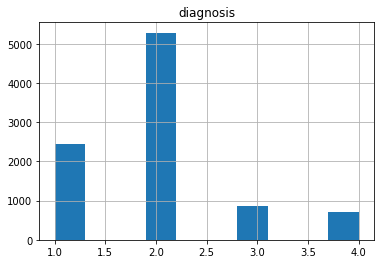

In [7]:
df2.hist()

In [8]:
df2.groupby('diagnosis').size()

diagnosis
1    2438
2    5288
3     872
4     708
dtype: int64

In [12]:
df2.head()

,image,level
4,15_left.jpeg,1
5,15_right.jpeg,2
6,16_left.jpeg,4
7,16_right.jpeg,4
9,17_right.jpeg,1


In [23]:
# df2 = df2.rename(columns={'image':'id_code'})
# df2 = df2.rename(columns={'level':'diagnosis'})

In [6]:
df2.id_code = df2.id_code.apply(lambda x: '../Data/Old_data/train_processed/'+x)
df1.id_code = df1.id_code.apply(lambda x: '../Data/train_processed/'+x)

In [15]:
df1.head()

,id_code,diagnosis
0,../Data/train_processed/000c1434d8d7.png,2
1,../Data/train_processed/001639a390f0.png,4
2,../Data/train_processed/0024cdab0c1e.png,1
5,../Data/train_processed/0083ee8054ee.png,4
7,../Data/train_processed/00a8624548a9.png,2


In [7]:
df3 =pd.concat([df1,df2])

In [26]:
df3.head()

,id_code,diagnosis
0,../Data/train_processed/000c1434d8d7.png,2
1,../Data/train_processed/001639a390f0.png,4
2,../Data/train_processed/0024cdab0c1e.png,1
3,../Data/train_processed/002c21358ce6.png,0
4,../Data/train_processed/005b95c28852.png,0


In [27]:
len(df1),len(df2),len(df3)

(3662, 35108, 38770)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f06250518>]],
      dtype=object)

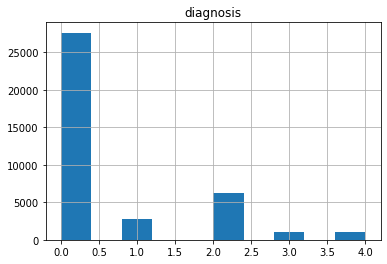

In [8]:
df3.hist()

In [30]:
df3.to_csv('../Data/CombinedUnbalanced.csv', index=False)

In [9]:
df3.groupby('diagnosis').size()/float(len(df3))

diagnosis
0    0.712071
1    0.072427
2    0.162161
3    0.027470
4    0.025871
dtype: float64

In [10]:
df3.groupby('diagnosis').size()

diagnosis
0    27607
1     2808
2     6287
3     1065
4     1003
dtype: int64

In [60]:
def OverUndersample(group,k=6287):
    if len(group) == 27607:
        return group.sample(int(len(group)/2.6))
    if len(group)==2808:
        return group.sample(int(len(group)/1.2))
    
#     else:
#         return group.sample(k,replace=True)
    else:
            return group
    

In [61]:
df4 = df3.groupby('diagnosis').apply(OverUndersample).reset_index(drop=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f0283e1d0>]],
      dtype=object)

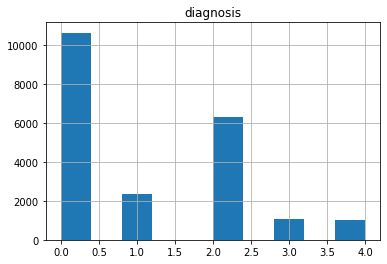

In [62]:
df4.hist()

In [63]:
df4.groupby('diagnosis').size()/len(df4)

diagnosis
0    0.498194
1    0.109792
2    0.294984
3    0.049970
4    0.047060
dtype: float64

In [29]:
df3.to_csv('../Data/CombinedDiseased.csv',index=False)

In [64]:
df4.to_csv('../Data/CombinedBalanced2.csv',index=False)